Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, betas, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1633 seconds.


             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta0      -0.000  0.043  -0.080    0.078      0.000    0.001   11254.0   
betas[0]   -0.048  0.120  -0.276    0.174      0.001    0.001    6706.0   
betas[1]    0.083  0.101  -0.113    0.267      0.001    0.001    8640.0   
betas[2]    0.183  0.145  -0.085    0.459      0.002    0.002    4439.0   
betas[3]    0.070  0.217  -0.325    0.491      0.003    0.002    6060.0   
...           ...    ...     ...      ...        ...      ...       ...   
betas[269]  0.054  0.084  -0.100    0.217      0.001    0.001   11122.0   
betas[270]  0.209  0.141  -0.051    0.480      0.002    0.001    7530.0   
betas[271]  0.139  0.160  -0.171    0.434      0.002    0.001    6293.0   
betas[272]  0.232  0.190  -0.137    0.578      0.002    0.002    6117.0   
sigma       0.721  0.082   0.573    0.875      0.003    0.002     622.0   

            ess_tail  r_hat  
beta0         4691.0   1.00  
betas[0]      5332.0   1.00  
betas[1] 

array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

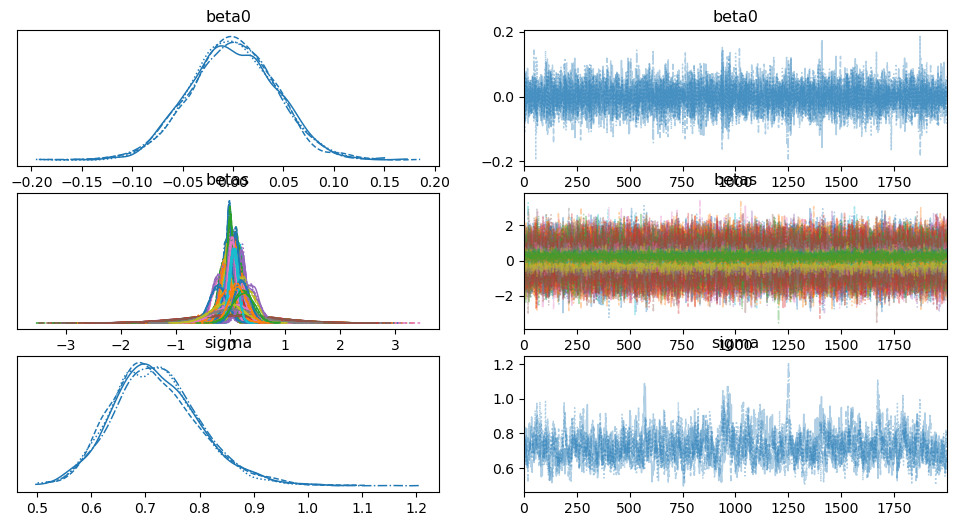

In [7]:
#Q2
#Dataset:https://www.kaggle.com/datasets/imnikhilanand/heart-attack-prediction?resource=download

import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("data.csv")

target_column = data.columns[-1]
X_raw = data.drop(columns=[target_column])
y_raw = data[target_column].values

X_encoded = pd.get_dummies(X_raw, drop_first=True)

scaler = StandardScaler()
X = scaler.fit_transform(X_encoded)

y_mean, y_std = y_raw.mean(), y_raw.std()
y = (y_raw - y_mean) / y_std

p = X.shape[1]

with pm.Model() as model:
    beta0 = pm.Normal("beta0", mu=0, sigma=5)
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p)
    sigma = pm.HalfNormal("sigma", sigma=5)

    mu = beta0 + pm.math.matmul(X, betas)

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

summary = az.summary(trace)
print(summary)

az.plot_trace(trace)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, beta0, betas, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5915 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta0      -0.000  0.048  -0.092    0.088      0.001    0.001    3187.0   
betas[0]   -0.043  0.126  -0.272    0.203      0.003    0.002    1349.0   
betas[1]    0.073  0.103  -0.121    0.268      0.002    0.001    2465.0   
betas[2]    0.146  0.158  -0.148    0.445      0.004    0.003    1725.0   
betas[3]    0.271  0.246  -0.178    0.745      0.006    0.004    1701.0   
...           ...    ...     ...      ...        ...      ...       ...   
betas[270]  0.251  0.157  -0.049    0.549      0.004    0.003    1751.0   
betas[271]  0.183  0.172  -0.132    0.524      0.004    0.003    2025.0   
betas[272]  0.270  0.203  -0.102    0.666      0.005    0.003    1778.0   
nu          7.887  8.199   1.310   22.544      0.267    0.189     380.0   
sigma       0.603  0.161   0.303    0.868      0.010    0.007     234.0   

            ess_tail  r_hat  
beta0         3836.0   1.00  
betas[0]      2575.0   1.00  
betas[1] 

array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'nu'}>, <Axes: title={'center': 'nu'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

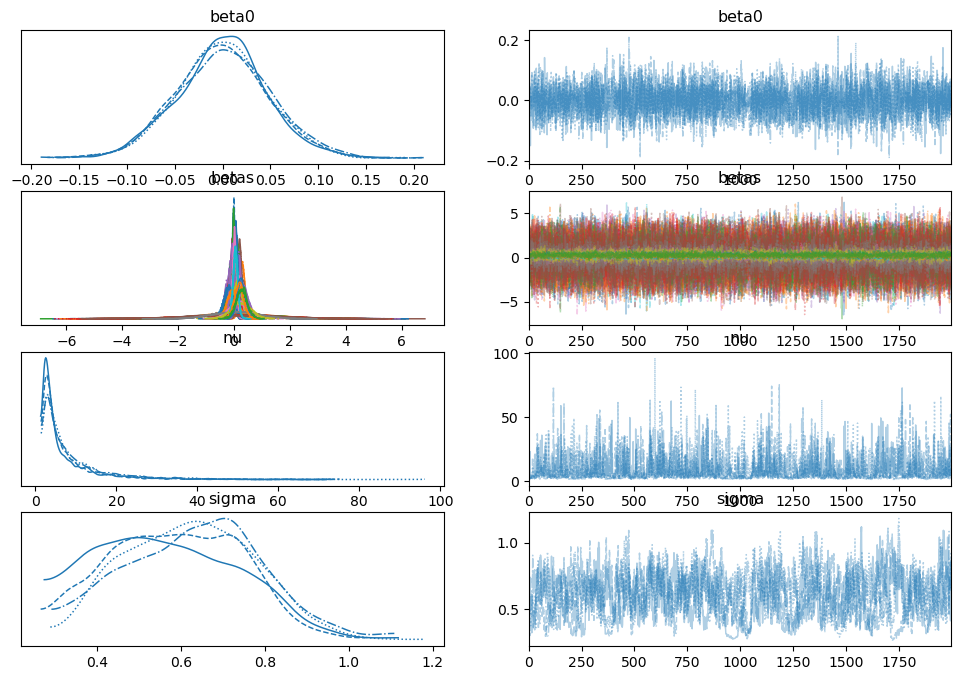

In [8]:
#Q3
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("data.csv")
target_column = data.columns[-1]
X_raw = data.drop(columns=[target_column])
y_raw = data[target_column].values
X_encoded = pd.get_dummies(X_raw, drop_first=True)
rng = np.random.default_rng(42)
outlier_count = int(0.05 * len(X_encoded))
outlier_indices = rng.choice(X_encoded.index, size=outlier_count, replace=False)
y_raw[outlier_indices] *= 3
scaler = StandardScaler()
X = scaler.fit_transform(X_encoded)
y_mean, y_std = y_raw.mean(), y_raw.std()
y = (y_raw - y_mean) / y_std
p = X.shape[1]

with pm.Model() as robust_model:
    nu = pm.Exponential("nu", 0.1)
    beta0 = pm.Normal("beta0", 0, 5)
    betas = pm.Normal("betas", 0, 2, shape=p)
    sigma = pm.HalfCauchy("sigma", 5)
    mu = beta0 + pm.math.matmul(X, betas)
    y_obs = pm.StudentT("y_obs", nu=nu, mu=mu, sigma=sigma, observed=y)
    trace_robust = pm.sample(2000, tune=1000, return_inferencedata=True)

summary_robust = az.summary(trace_robust)
print(summary_robust)
az.plot_trace(trace_robust)
